# <div align = center>التّأكّد من سلامة الأوراق النّقديّة

<hr>

# 1. Import Librairies

In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
import pandas as pan
import matplotlib.pyplot as plt

# 2. Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data = pan.read_csv('/content/drive/My Drive/data/money.csv')

In [4]:
data.describe()

,X1,X2,X3,X4,Label1,Label2
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606,0.555394
std,2.842763,5.869047,4.310030,2.101013,0.497103,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000,1.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000,1.000000


In [5]:
data.head()

,X1,X2,X3,X4,Label1,Label2
0,-0.025314,-0.17383,-0.11339,1.21980,1,0
1,5.807000,5.00970,-2.23840,0.43878,0,1
2,-2.434900,-9.24970,8.99220,-0.50001,1,0
3,-1.693600,2.78520,-2.18350,-1.92760,1,0
4,0.636550,5.20220,-5.21590,-6.12110,1,0


In [6]:
#training data
X=data.loc[:, ['X1', 'X2', 'X3', 'X4']].values
Y=data.loc[:, ["Label1"]].values

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.35)

# 3. Build and Compile Model

In [8]:
model = Sequential([
  Dense(units=4 , activation='relu', name='Hidden_Layer_1',input_dim=4),
  Dense(units=1 , activation='sigmoid', name='prediction')
])

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 4)                 20        
_________________________________________________________________
prediction (Dense)           (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None


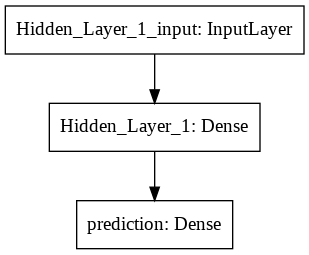

In [10]:
plot_model(model, to_file='money_shared_input_layer.png')

In [11]:
model.compile(loss='BinaryCrossentropy', optimizer='sgd', metrics='accuracy')

# 4. Fit, Predict and Evaluate

In [12]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=100, verbose=0, validation_split=0.3)

In [13]:
Y_hat = model.predict(X_test)
Y_hat = [0 if val < 0.5 else 1 for val in Y_hat]

In [14]:
acc = accuracy_score(Y_test, Y_hat)
print("Accuracy = %0.2f" % (acc*100), "%")

Accuracy = 98.54 %


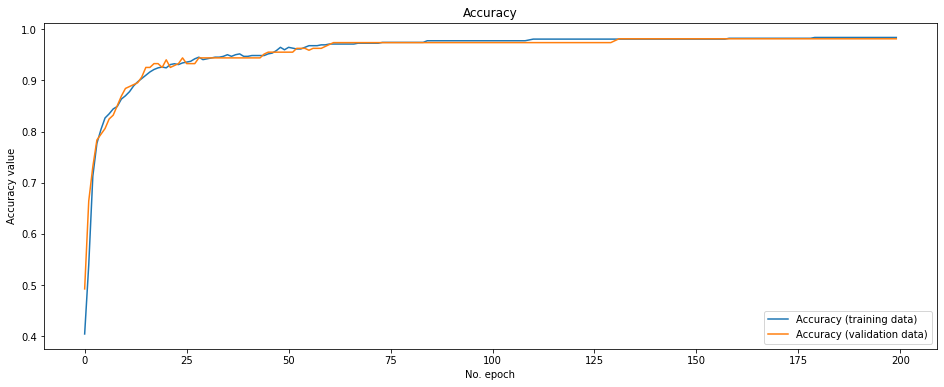

In [15]:
# Plot history: Accuracy
plt.figure(figsize=(16,6))
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

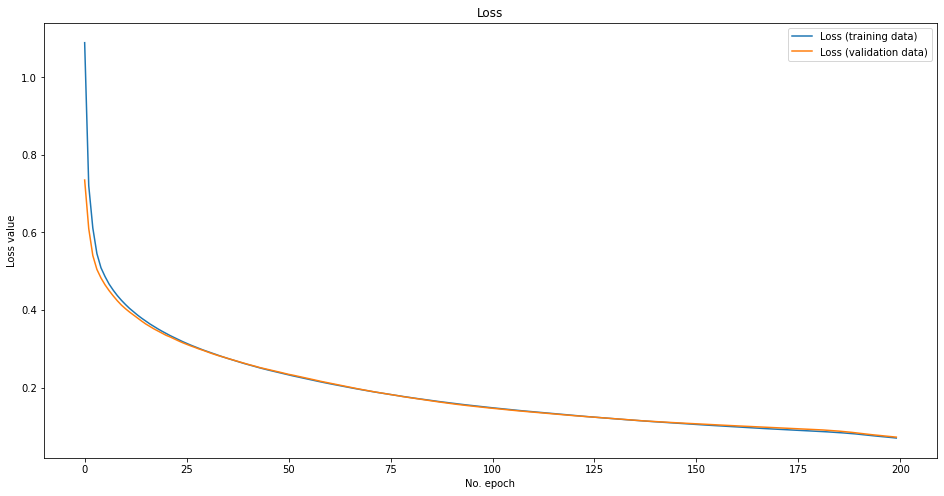

In [16]:
# Plot history: Loss
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

# 5. Saving and Reloading

In [17]:
model.save('tfmodel_350')

INFO:tensorflow:Assets written to: tfmodel_350/assets


INFO:tensorflow:Assets written to: tfmodel_350/assets


In [18]:
del model 

In [19]:
model = load_model('tfmodel_350')

In [20]:
Y_hat = model.predict(X_test)[17]
Y_hat[0]

0.9439633